In [43]:
import tensorflow as tf 
from tensorflow.keras import  layers, models
import matplotlib.pyplot as plt
import Data_preparation as DP 
DP=DP.Data_preparation()


from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder



In [50]:
Images,Labels=DP.create_Image_dataset("BIG_Bilder",100,100)
#hole_set=np.append(Images,Labels)

train_images,test_images,train_labels,test_labels=DP.split_Image_data(Images,Labels,0.8)




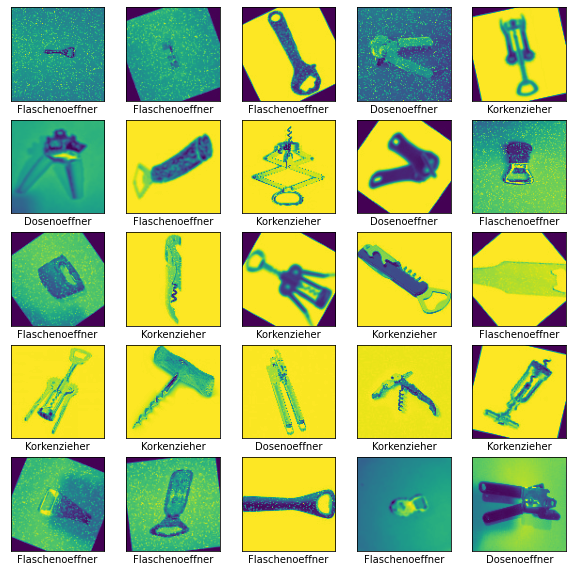

In [51]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(test_labels[i])
plt.show()

In [52]:
X_train=train_images.reshape(train_images.shape[0],100,100,1)
X_test=test_images.reshape(test_images.shape[0],100,100,1)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train/=255
X_test/=255

In [71]:
lb=LabelEncoder()
int_train_labels=lb.fit_transform(train_labels)
int_test_labels=lb.fit_transform(test_labels)


n_classes = 3
print("Shape before one-hot encoding: ",train_labels.shape)
Y_train = np_utils.to_categorical(int_train_labels, n_classes)
Y_test = np_utils.to_categorical(int_test_labels, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (3864,)
Shape after one-hot encoding:  (3864, 3)


In [78]:
model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(100, 100, 1)))



model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())


model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(3, activation='softmax'))

In [79]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [80]:
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
31/31 [==============================] - 88s 3s/step - loss: 1.0982 - accuracy: 0.3429 - val_loss: 1.0950 - val_accuracy: 0.3613
Epoch 2/10
31/31 [==============================] - 95s 3s/step - loss: 1.0966 - accuracy: 0.3574 - val_loss: 1.0941 - val_accuracy: 0.3613
Epoch 3/10
31/31 [==============================] - 99s 3s/step - loss: 1.0964 - accuracy: 0.3561 - val_loss: 1.0936 - val_accuracy: 0.3613
Epoch 4/10
31/31 [==============================] - 105s 3s/step - loss: 1.0963 - accuracy: 0.3605 - val_loss: 1.0932 - val_accuracy: 0.3613
Epoch 5/10
 8/31 [======>.......................] - ETA: 1:12 - loss: 1.0978 - accuracy: 0.3535

KeyboardInterrupt: 